In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import seaborn as sns
import os.path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import plotly.express as px

%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load transaction data frame
transactions = pd.read_csv("D:/DeepLearning/H&M/transactions_train.csv")
transactions = transactions.head(2000)
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [3]:
transactions['bought'] = 1 #the interaction matrix will be binary
df=transactions[['customer_id', 'article_id', 'bought']]
df.head()

,customer_id,article_id,bought
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1


In [4]:
df = df.drop_duplicates()

In [5]:
# Creating a sparse pivot table with customers in rows and items in columns
customer_items_matrix_df = df.pivot(index   = 'customer_id', 
                                    columns = 'article_id', 
                                    values  = 'bought').fillna(0)
customer_items_matrix_df.head(10)

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8adc73323aebf571fd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001fd23db1109a94bba1319bb73df0b479059027c182da490e1161b34cd3af61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0021da829b898f82269fc51feded4eac2129058ee95bd75bb1591e2eb14ecc79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
customer_items_matrix_df.shape

(599, 1496)

In [7]:
customer_items_matrix_df_train, customer_items_matrix_df_test = train_test_split(customer_items_matrix_df,test_size=0.33, random_state=42)
print(customer_items_matrix_df_train.shape, customer_items_matrix_df_test.shape)

(401, 1496) (198, 1496)


In [8]:
# Calculate matrix sparsity

how_sparse = customer_items_matrix_df_train.values.mean()*100

print("We have only", how_sparse, "percent of the values filled in the sparse matrix.")

We have only 0.20520223505407606 percent of the values filled in the sparse matrix.


In [9]:
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [11]:
X.shape[1]

1496

In [12]:
# We want to map the input to itself
X = customer_items_matrix_df_train.values

# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

hist = model.fit(x=X, y=X,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 UserScore (InputLayer)      [(None, 1496)]            0         
                                                                 
 EncLayer1 (Dense)           (None, 512)               766464    
                                                                 
 LatentSpace (Dense)         (None, 256)               131328    
                                                                 
 Dropout (Dropout)           (None, 256)               0         
                                                                 
 DecLayer1 (Dense)           (None, 512)               131584    
                                                                 
 UserScorePred (Dense)       (None, 1496)              767448    
                                                                 
Total params: 1796824 (6.85 MB)
Trainable params: 1796824 (6.

In [13]:
hist = model.fit(x=X, y=X,
                  epochs=50,# Using 50 here instead of 10 or 20 improved the performance very much!
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Epoch 1/50



6/6 [==============================] - 1s 26ms/step - loss: 0.0364 - val_loss: 0.0085
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0215 - val_loss: 0.0067
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0147 - val_loss: 0.0054
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0046
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/50
6/6 [=======================

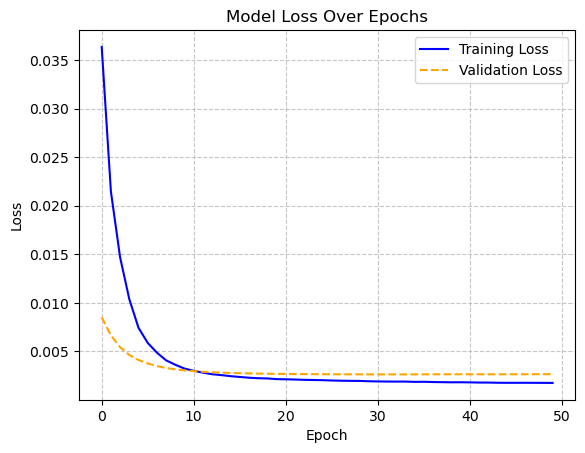

In [33]:
def plot_hist(hist):
    # Create figure & 1 axis
    fig, ax = plt.subplots()

    # Plot training loss
    ax.plot(hist.history['loss'], label='Training Loss', color='blue', linestyle='-')

    # Plot validation loss
    ax.plot(hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')

    # Set plot title and labels
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

# Assuming 'hist' is the history object from model.fit
plot_hist(hist)

In [15]:
# Predict new Matrix Interactions, set score zero on articles customer haven't purchased
new_matrix = model.predict(X) * (X[0] == 0)

13/13 [==============================] - 0s 2ms/step


In [16]:
# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df  = pd.DataFrame(new_matrix, 
                                            columns = customer_items_matrix_df_train.columns, 
                                            index   = customer_items_matrix_df_train.index)
new_customer_items_matrix_df.head()

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82dc9030c4d536a137c,0.002053,0.008996,-0.002588,0.005631,0.001892,0.005675,-0.000185,-0.005796,0.003104,-0.001941,...,0.005059,-0.000912,0.004831,0.002733,0.006623,0.000122,0.001474,0.001175,0.001258,-0.006027
029ceb992cb63df03c109790046e3fdebfce0b63c968823dd461b7f18ecc6b30,0.062660,0.003160,0.016739,0.013930,0.014710,-0.009409,0.047706,-0.039421,0.012226,-0.003664,...,0.026226,-0.010571,-0.005334,-0.004732,0.005601,-0.001458,-0.007932,0.010412,0.002134,0.021371
02334389c86031bc841c43b000006162d3bdadd0a88acd650eaebdb3f1beb9c5,0.003327,0.013564,-0.003244,0.007979,0.000614,0.000737,0.011359,0.008739,-0.005967,0.001543,...,0.001698,0.000433,0.003443,0.005131,0.000513,0.000123,0.002689,0.003555,0.001155,-0.001818
07a420b50098f077205a5d56780dd0d946034362b00198f7e5b5114876c29151,-0.004924,0.010014,-0.002320,0.000376,0.002196,0.006691,-0.002272,0.002472,-0.004668,-0.000493,...,0.003735,0.004310,0.002304,0.007502,0.002264,0.003347,0.006875,0.004316,0.000104,-0.000684
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2ccae83e9895b5dcbe453,-0.009124,0.009420,-0.004351,-0.001547,0.000881,0.000532,0.007933,-0.000478,0.004857,-0.004585,...,0.000759,-0.000223,0.006911,0.007130,0.001016,0.003346,0.006272,0.009551,-0.002338,-0.001110


In [17]:
print(new_customer_items_matrix_df.values.min(), new_customer_items_matrix_df.values.max())

-0.17381226 0.82547104


In [18]:
def recommender_for_customer(customer_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Articles for Customers
    '''
    pred_scores = interact_matrix.loc[customer_id].values

    df_scores   = pd.DataFrame({'article_id': list(customer_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('article_id')\
                    .join(df_content.set_index('article_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'prod_name']]
    
    return df_rec[df_rec.score > 0]

In [19]:
articles = pd.read_csv("D:/DeepLearning/H&M/articles.csv")

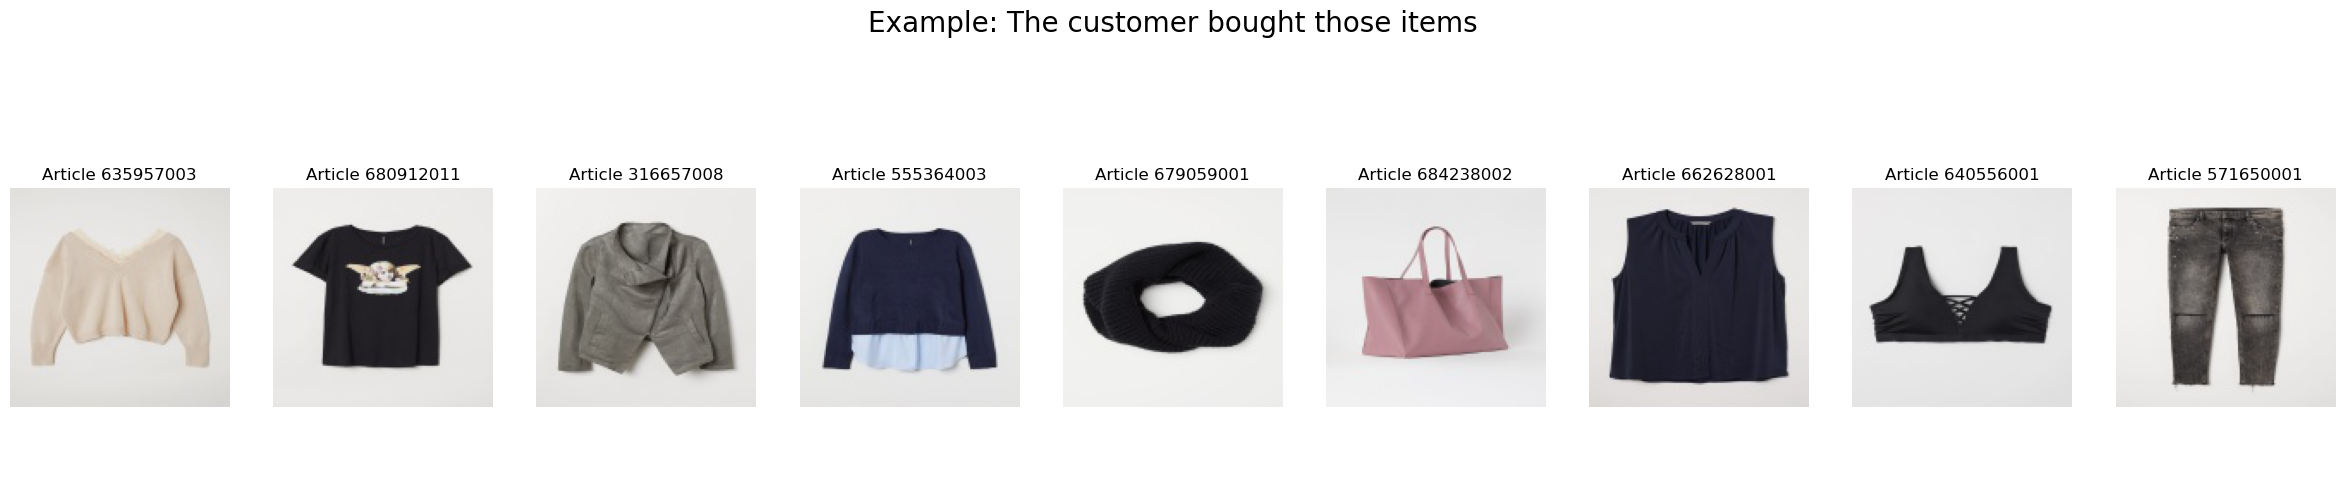

In [20]:
# EXAMPLE: ARTICLE previously purchased by the customer
hist_customer=recommender_for_customer(customer_id     = '02e0910945216963833093e0e56712e7362b01b7ef0cd4b375f857542b085020', 
                         interact_matrix = customer_items_matrix_df, 
                         df_content      = articles)


prev_items = hist_customer.index.values
k=len(prev_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: The customer bought those items\n\n',size=20)
plt.axis('off')

for item, i in zip(prev_items, range(1, k+1)):
    article_id = str(item)
    path = "D:/DeepLearning/H&M/images_128_128/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
    image = plt.imread(path)
    fig.add_subplot(1, k, i)
    plt.title('Article %i'%item,size=12)
    plt.axis('off') 
    plt.imshow(image)

In [21]:
#EXAMPLE: SEE THE LIST OF ARTICLES previously purchased by the customer
hist_customer

,score,prod_name
article_id,,
635957003,1.0,CSP Coronado lace sweater
680912011,1.0,Linni tee
316657008,1.0,Karenina Jacket
555364003,1.0,Spencer Shirt Sweater
679059001,1.0,GABBY KNITTED TUBE
684238002,1.0,Savannah shopper (1)
662628001,1.0,MC Eleven top
640556001,1.0,Bali top BIG
571650001,1.0,Taylor Fancy Denim


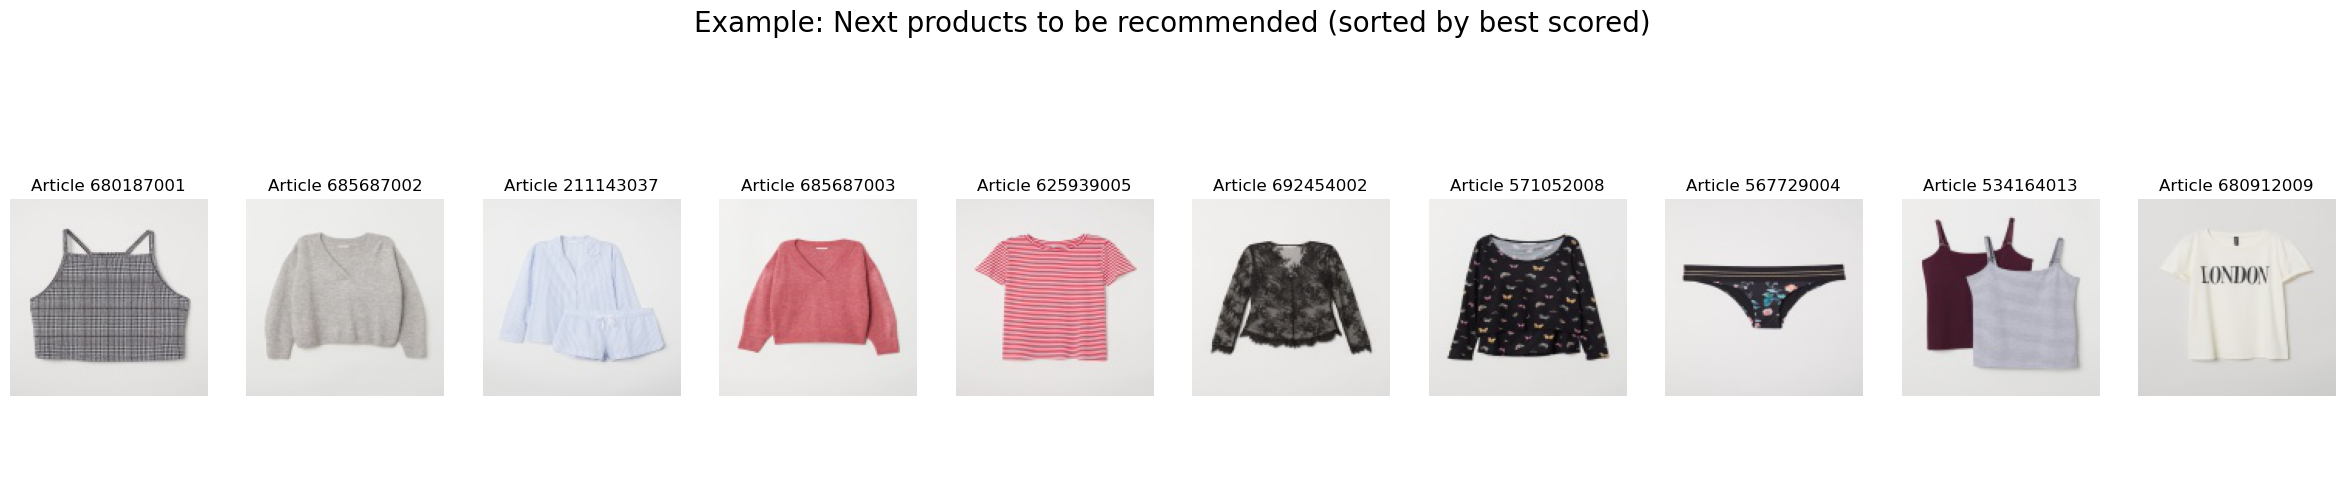

In [22]:
#EXAMPLE: Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec=recommender_for_customer(customer_id     = '02e0910945216963833093e0e56712e7362b01b7ef0cd4b375f857542b085020', 
                         interact_matrix = new_customer_items_matrix_df, 
                         df_content      = articles)

next_items = hist_customer_rec.index.values
k=len(next_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: Next products to be recommended (sorted by best scored)\n\n',size=20)
plt.axis('off')

for item, i in zip(next_items, range(1, k+1)):
    try:
        article_id = str(item)
        path = "D:/DeepLearning/H&M/images_128_128/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
        image = plt.imread(path)
        fig.add_subplot(1, k, i)    
        plt.title('Article %i'%item,size=12)
        plt.axis('off') 
        plt.imshow(image)
    except: 
        pass

In [23]:
#EXAMPLE: SEE THE LIST OF Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec

,score,prod_name
article_id,,
680187001,0.151238,HOPPER 9.99
685687002,0.139104,W YODA KNIT OL OFFER
211143037,0.138807,Janet SL-set (W)
685687003,0.134091,W YODA KNIT OL OFFER
625939005,0.131492,Cat Tee
692454002,0.130941,EDC LAURA LACE TOP
571052008,0.127827,P Pia long sleeve
567729004,0.126632,Love Affair Brief
534164013,0.124659,NT Alva 2-pack


In [24]:
# We want to map the input to itself (that is what auto-encoders do, apparently)
X_test = customer_items_matrix_df_test.values

In [25]:
X_test.shape # It's important that the second value is the same as in the training data... I guess it would be great if it was more flexible but I don't know how to do that 

(198, 1496)

In [26]:
# Predict new Matrix Interactions, set score zero on articles customer haven't purchased
new_matrix_test = model.predict(X_test) * (X_test[0] == 0)

7/7 [==============================] - 0s 2ms/step


In [27]:
# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df_test  = pd.DataFrame(new_matrix_test, 
                                            columns = customer_items_matrix_df_test.columns, 
                                            index   = customer_items_matrix_df_test.index)
new_customer_items_matrix_df_test.head()

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4,0.010610,-0.051197,-0.006288,0.026110,0.015295,0.010428,0.027288,0.042719,0.015212,-0.003430,...,0.013805,0.004792,-0.020623,-0.015065,0.020851,0.002901,0.020402,-0.010987,0.000829,-0.026354
077641946a092614f6da9c0ab14ce034907c4e168bd73ae680f423a11c20bf71,-0.173243,0.059778,0.074553,0.043075,-0.041539,-0.033854,0.021499,-0.053294,0.005513,0.016667,...,-0.076055,0.005052,0.069151,-0.009297,-0.015774,-0.013291,-0.062896,-0.005332,0.011706,-0.014675
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b4d6a8a7cc9f43ad0f,0.018104,0.030237,0.010692,0.024289,-0.015650,-0.004640,-0.000569,-0.005806,-0.020531,-0.009956,...,-0.023994,0.026040,0.034752,-0.010560,-0.031637,0.003722,0.006853,-0.014907,-0.014981,0.010750
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1,0.040130,0.007997,-0.011559,-0.030568,0.014308,0.012615,0.004228,0.024911,-0.007700,0.004602,...,0.007525,-0.018611,0.008348,-0.016545,0.020411,-0.008404,-0.008569,-0.007954,-0.001960,0.009549
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f4549778a2e918a7bd,0.043119,-0.020928,-0.003484,-0.010125,0.021546,0.011274,0.007448,-0.046832,-0.008579,-0.017209,...,0.028297,0.019398,-0.006408,-0.022638,0.012605,0.009098,0.005422,-0.045264,-0.017896,0.002475


In [28]:
# EXAMPLE: ARTICLE previously purchased by the customer
recommendations = recommender_for_customer(customer_id     = '01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4', 
                                           interact_matrix = customer_items_matrix_df_test, 
                                           df_content      = articles)
print(recommendations)

            score         prod_name
article_id                         
657497007     1.0  Bellini price CF
625773001     1.0           Portman
456163026     1.0         Woody (1)
674336001     1.0       Kamikaze CF
676954001     1.0     Memphis Dress


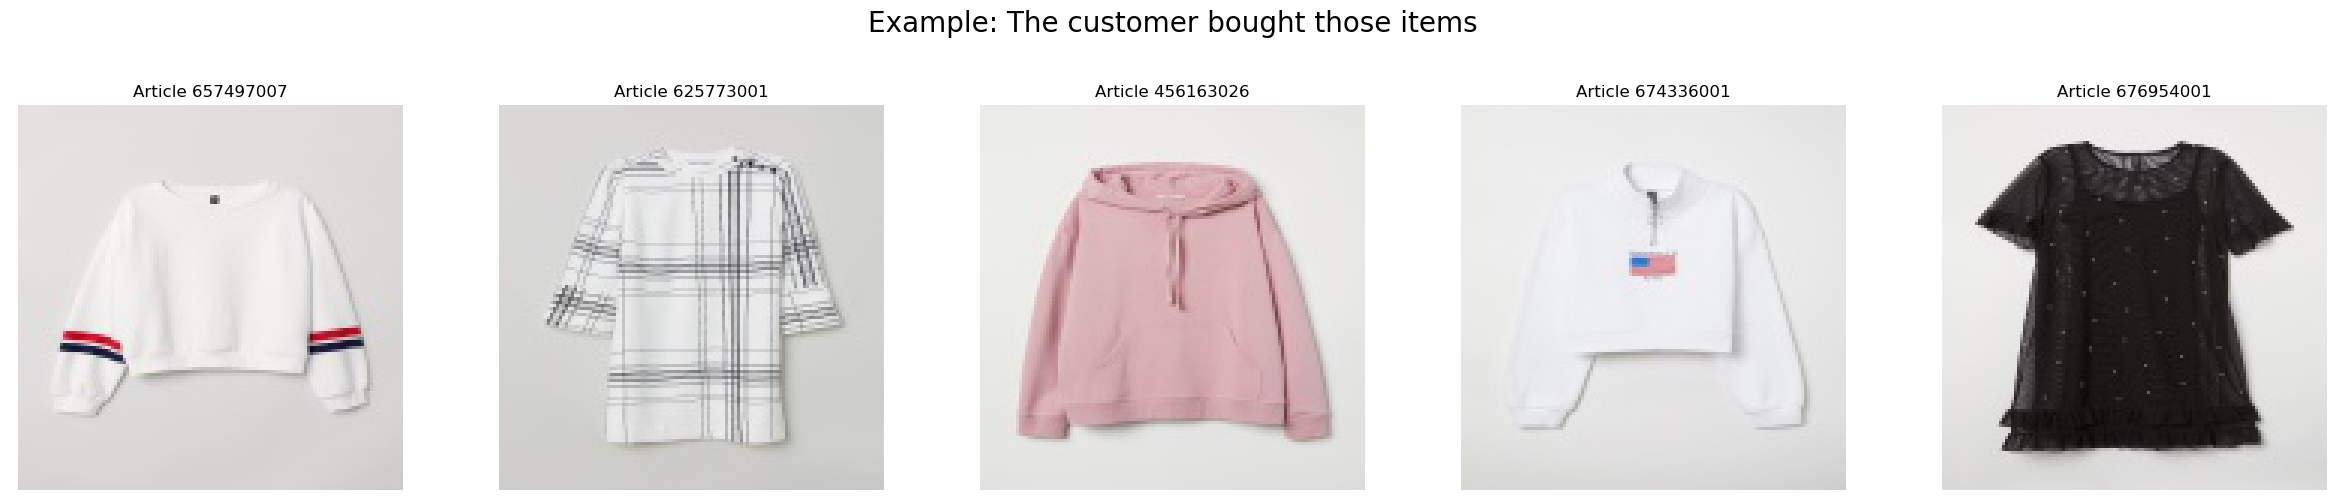

In [29]:
# EXAMPLE: ARTICLE previously purchased by the customer
hist_customer_test=recommender_for_customer(customer_id     = '01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4', 
                         interact_matrix = customer_items_matrix_df_test, 
                         df_content      = articles)


prev_items = hist_customer_test.index.values
k=len(prev_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: The customer bought those items\n\n',size=20)
plt.axis('off')

for item, i in zip(prev_items, range(1, k+1)):
    article_id = str(item)
    path = "D:/DeepLearning/H&M/images_128_128/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
    image = plt.imread(path)
    fig.add_subplot(1, k, i)
    plt.title('Article %i'%item,size=12)
    plt.axis('off') 
    plt.imshow(image)

In [30]:
#EXAMPLE: SEE THE LIST OF ARTICLES previously purchased by the customer
hist_customer_test

,score,prod_name
article_id,,
657497007,1.0,Bellini price CF
625773001,1.0,Portman
456163026,1.0,Woody (1)
674336001,1.0,Kamikaze CF
676954001,1.0,Memphis Dress


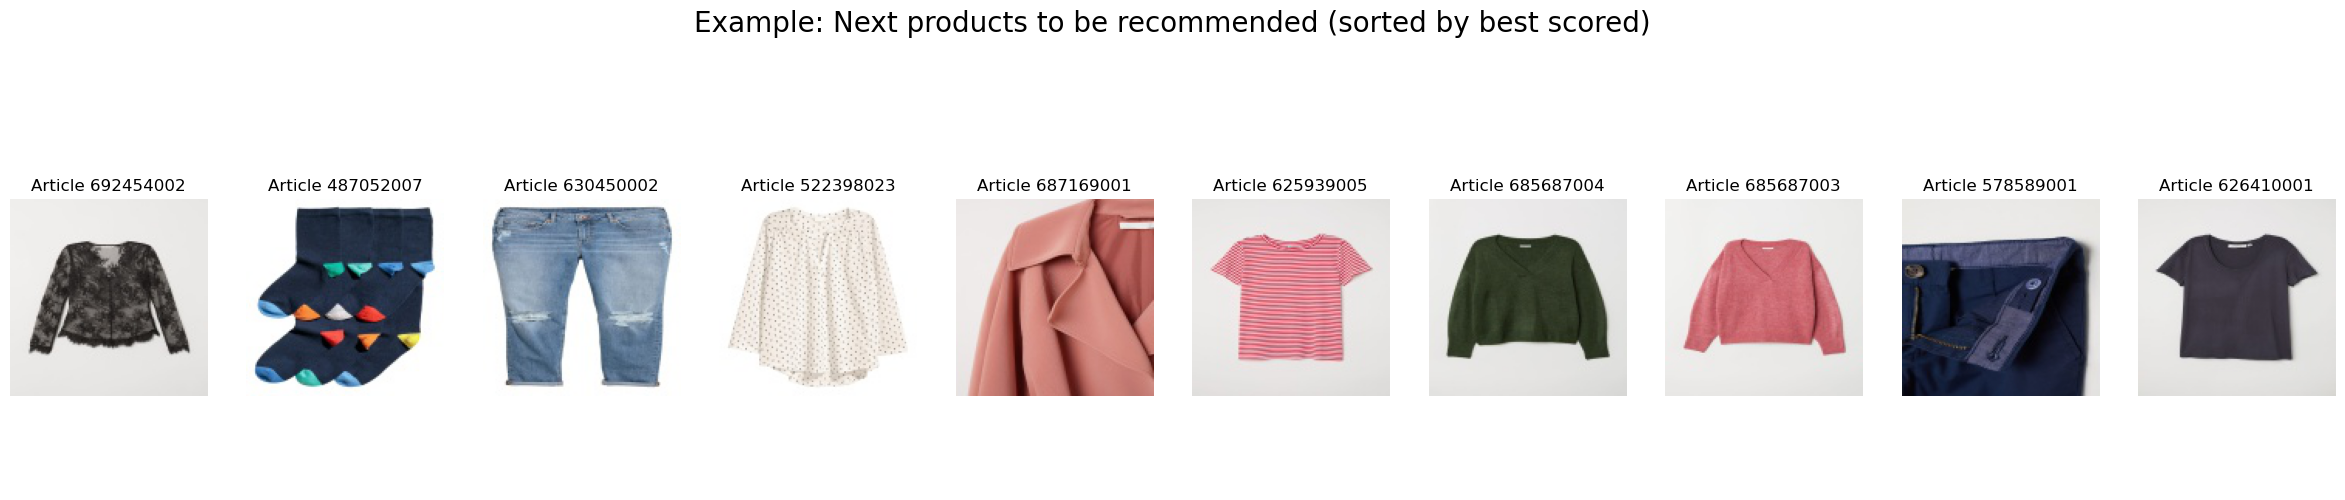

In [31]:
#EXAMPLE: Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec_test=recommender_for_customer(customer_id     = '01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4', 
                         interact_matrix = new_customer_items_matrix_df_test, 
                         df_content      = articles)

next_items = hist_customer_rec_test.index.values
k=len(next_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: Next products to be recommended (sorted by best scored)\n\n',size=20)
plt.axis('off')

for item, i in zip(next_items, range(1, k+1)):
    try:
        article_id = str(item)
        path = "D:/DeepLearning/H&M/images_128_128/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
        image = plt.imread(path)
        fig.add_subplot(1, k, i)    
        plt.title('Article %i'%item,size=12)
        plt.axis('off') 
        plt.imshow(image)
    except: 
        pass

In [32]:
#EXAMPLE: SEE THE LIST OF Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec_test

,score,prod_name
article_id,,
692454002,0.100898,EDC LAURA LACE TOP
487052007,0.095141,TP Weekday 7-p anklesock SB
630450002,0.086413,Nikki boyfriend
522398023,0.084562,Vincent
687169001,0.083522,Paris trench
625939005,0.081311,Cat Tee
685687004,0.080833,W YODA KNIT OL OFFER
685687003,0.066919,W YODA KNIT OL OFFER
578589001,0.066824,Pierce chino
